# Stockdata API

In [2]:
import requests 
from dotenv import load_dotenv
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 


load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"
#print(api_key)

url=f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()


In [3]:
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5546 entries, 2021-11-12 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5546 non-null   float64
 1   2. high    5546 non-null   float64
 2   3. low     5546 non-null   float64
 3   4. close   5546 non-null   float64
 4   5. volume  5546 non-null   float64
dtypes: float64(5)
memory usage: 260.0+ KB


In [5]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-11-12,148.43,150.400,147.4800,149.99,63245197.0
2021-11-11,148.96,149.430,147.6810,147.87,40999950.0
2021-11-10,150.02,150.130,147.8500,147.92,65187092.0
2021-11-09,150.20,151.428,150.0601,150.81,56573449.0
2021-11-08,151.41,151.570,150.1600,150.44,55020868.0


In [6]:
import time

symbols = ["AAPL" , "TSLA", "NVDA" ,"IBM"]
stock_list = []

for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(15)

In [7]:
stocks = pd.concat(stock_list,axis=1)
stocks.to_csv("stocks.csv")
stocks

,AAPL,TSLA,NVDA,IBM
2021-11-12,149.99,1033.42,303.90,118.96
2021-11-11,147.87,1063.51,303.90,120.27
2021-11-10,147.92,1067.95,294.59,120.22
2021-11-09,150.81,1023.50,306.57,120.85
2021-11-08,150.44,1162.94,308.04,124.54
...,...,...,...,...
1999-11-05,88.31,NaN,28.25,90.25
1999-11-04,83.62,NaN,29.19,91.56
1999-11-03,81.50,NaN,27.44,94.37
1999-11-02,80.25,NaN,25.00,94.81


In [8]:
stocks = pd.read_csv("stocks.csv",index_col=0)

stocks.head(10)

,AAPL,TSLA,NVDA,IBM
2021-11-12,149.99,1033.42,303.90,118.96
2021-11-11,147.87,1063.51,303.90,120.27
2021-11-10,147.92,1067.95,294.59,120.22
2021-11-09,150.81,1023.50,306.57,120.85
2021-11-08,150.44,1162.94,308.04,124.54
2021-11-05,151.28,1222.09,297.52,123.61
2021-11-04,150.96,1229.91,298.01,120.85
2021-11-03,151.49,1213.86,265.98,127.13
2021-11-02,150.02,1172.00,264.01,126.18
2021-11-01,148.96,1208.59,258.27,126.28


In [9]:
stocks.index = pd.to_datetime(stocks.index)

(2, 2)
(4,)


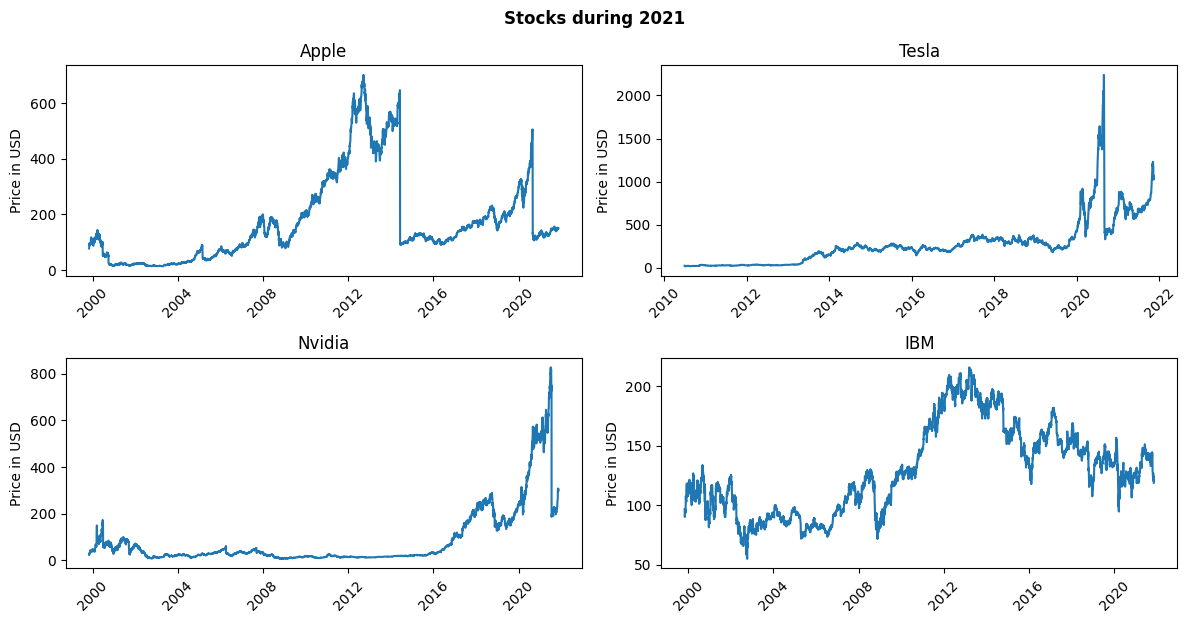

In [18]:
fig, ax = plt.subplots(2,2,dpi=100,figsize=(12,6))
print(ax.shape)
print(ax.flatten().shape)

stock_names = dict( AAPL = "Apple", TSLA="Tesla", NVDA = "Nvidia", IBM = "IBM")

for axis,symbol in zip(ax.flatten(),stock_names):
    sns.lineplot(data=stocks,x=stocks.index,y=symbol,ax=axis)
    axis.tick_params(axis="x",rotation = 45)
    axis.set(title=f"{stock_names[symbol]}",ylabel="Price in USD")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03 ,fontweight="bold")

plt.savefig("Stocks2021.png",facecolor="white")

